# classification models using tensorflow

In [2]:
#how to avoid overfitting using callback techniques and dropout layers

In [3]:
#dropout layer -> avaoid overfitting

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv("C:\\Users\\st\\Documents\\Tensorflow_Keras\\Tensorflow_Keras\\FINAL-TF2-FILES\\TF_2_Notebooks_and_Data\\DATA\\cancer_classification.csv")

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [10]:
#EDA

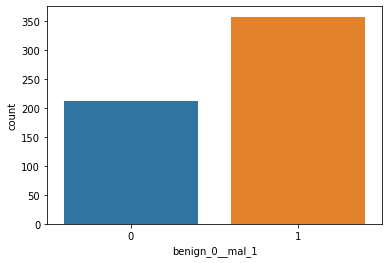

In [11]:
sns.countplot(x='benign_0__mal_1',data=df) #to check balanced data

In [12]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

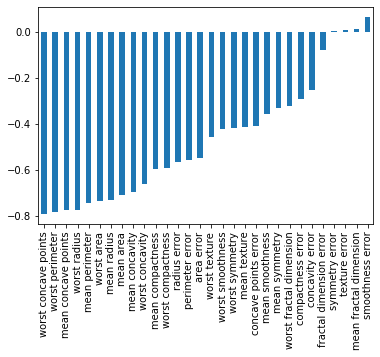

In [13]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

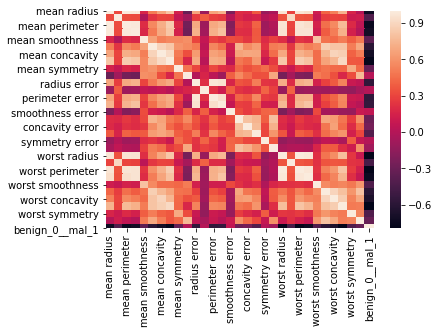

In [14]:
sns.heatmap(df.corr())

In [15]:
X=df.drop('benign_0__mal_1',axis=1).values

In [16]:
y=df['benign_0__mal_1'].values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler=MinMaxScaler()

In [21]:
X_train=scaler.fit_transform(X_train)

In [22]:
X_test=scaler.transform(X_test)#prevent data leakage

In [23]:
#prevent overfittig 

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
from tensorflow.keras.layers import Dense,Dropout

In [26]:
X_train.shape

(426, 30)

In [27]:
model =Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

#BINARY CLASSIFICATION PROBLEM
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [28]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6907 - val_loss: 0.6658
Epoch 2/600
426/426 [==============================] - 0s 101us/sample - loss: 0.6444 - val_loss: 0.6240
Epoch 3/600
426/426 [==============================] - 0s 89us/sample - loss: 0.6030 - val_loss: 0.5831
Epoch 4/600
426/426 [==============================] - 0s 80us/sample - loss: 0.5593 - val_loss: 0.5320
Epoch 5/600
426/426 [==============================] - 0s 63us/sample - loss: 0.5013 - val_loss: 0.4644
Epoch 6/600
426/426 [==============================] - 0s 56us/sample - loss: 0.4368 - val_loss: 0.4026
Epoch 7/600
426/426 [==============================] - 0s 54us/sample - loss: 0.3832 - val_loss: 0.3515
Epoch 8/600
426/426 [==============================] - 0s 61us/sample - loss: 0.3393 - val_loss: 0.3094
Epoch 9/600
426/426 [==============================] - 0s 59us/sample - loss: 0.3032 - val_loss: 0.2782
Epoch 10/600
426/4

426/426 [==============================] - 0s 59us/sample - loss: 0.0578 - val_loss: 0.1122
Epoch 79/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0571 - val_loss: 0.1198
Epoch 80/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0560 - val_loss: 0.1107
Epoch 81/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0551 - val_loss: 0.1231
Epoch 82/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0545 - val_loss: 0.1102
Epoch 83/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0540 - val_loss: 0.1241
Epoch 84/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0546 - val_loss: 0.1124
Epoch 85/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0534 - val_loss: 0.1144
Epoch 86/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0536 - val_loss: 0.1130
Epoch 87/600
426/426 [==============================] - 0s 63us/samp

426/426 [==============================] - 0s 59us/sample - loss: 0.0459 - val_loss: 0.1416
Epoch 156/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0535 - val_loss: 0.1327
Epoch 157/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0505 - val_loss: 0.1417
Epoch 158/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0460 - val_loss: 0.1448
Epoch 159/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0448 - val_loss: 0.1367
Epoch 160/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0441 - val_loss: 0.1458
Epoch 161/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0451 - val_loss: 0.1393
Epoch 162/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0449 - val_loss: 0.1457
Epoch 163/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0459 - val_loss: 0.1463
Epoch 164/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 59us/sample - loss: 0.0398 - val_loss: 0.1537
Epoch 233/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0445 - val_loss: 0.1529
Epoch 234/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0406 - val_loss: 0.1649
Epoch 235/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0397 - val_loss: 0.1587
Epoch 236/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0405 - val_loss: 0.1697
Epoch 237/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0402 - val_loss: 0.1569
Epoch 238/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0452 - val_loss: 0.1637
Epoch 239/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0415 - val_loss: 0.1509
Epoch 240/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0441 - val_loss: 0.1622
Epoch 241/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 56us/sample - loss: 0.0363 - val_loss: 0.1658
Epoch 310/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0347 - val_loss: 0.1731
Epoch 311/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0344 - val_loss: 0.1722
Epoch 312/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0439 - val_loss: 0.1897
Epoch 313/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0372 - val_loss: 0.1706
Epoch 314/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0349 - val_loss: 0.1744
Epoch 315/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0411 - val_loss: 0.1742
Epoch 316/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0405 - val_loss: 0.1557
Epoch 317/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0359 - val_loss: 0.1767
Epoch 318/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 54us/sample - loss: 0.0290 - val_loss: 0.1944
Epoch 387/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0281 - val_loss: 0.1865
Epoch 388/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0294 - val_loss: 0.1863
Epoch 389/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0317 - val_loss: 0.1916
Epoch 390/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0280 - val_loss: 0.2093
Epoch 391/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0324 - val_loss: 0.1967
Epoch 392/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0290 - val_loss: 0.2118
Epoch 393/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0293 - val_loss: 0.1846
Epoch 394/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0298 - val_loss: 0.2001
Epoch 395/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 75us/sample - loss: 0.0264 - val_loss: 0.2146
Epoch 464/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0264 - val_loss: 0.1989
Epoch 465/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0249 - val_loss: 0.2431
Epoch 466/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0278 - val_loss: 0.1969
Epoch 467/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0246 - val_loss: 0.2109
Epoch 468/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0257 - val_loss: 0.2298
Epoch 469/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0360 - val_loss: 0.2222
Epoch 470/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0254 - val_loss: 0.2052
Epoch 471/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0291 - val_loss: 0.2280
Epoch 472/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 66us/sample - loss: 0.0218 - val_loss: 0.2198
Epoch 541/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0193 - val_loss: 0.2437
Epoch 542/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0195 - val_loss: 0.2255
Epoch 543/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0215 - val_loss: 0.2471
Epoch 544/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0206 - val_loss: 0.2429
Epoch 545/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0206 - val_loss: 0.2173
Epoch 546/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0213 - val_loss: 0.2259
Epoch 547/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0231 - val_loss: 0.2477
Epoch 548/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0274 - val_loss: 0.2055
Epoch 549/600
426/426 [==============================] - 0s 

In [31]:
losses=pd.DataFrame(model.history.history)

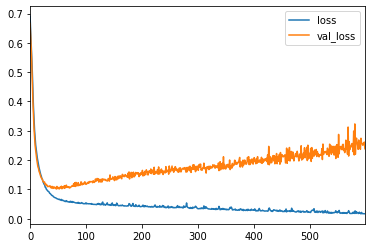

In [32]:
losses.plot()

In [33]:
#callbacks based on your validation loss

In [34]:
model =Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

#BINARY CLASSIFICATION PROBLEM
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [37]:
#loss to min .
#accu max
early_stop = EarlyStopping(monitor="val_loss",mode='min',verbose=1,patience=25)

In [38]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 887us/sample - loss: 0.6987 - val_loss: 0.6774
Epoch 2/600
426/426 [==============================] - 0s 68us/sample - loss: 0.6556 - val_loss: 0.6419
Epoch 3/600
426/426 [==============================] - 0s 63us/sample - loss: 0.6167 - val_loss: 0.5999
Epoch 4/600
426/426 [==============================] - 0s 61us/sample - loss: 0.5739 - val_loss: 0.5552
Epoch 5/600
426/426 [==============================] - 0s 61us/sample - loss: 0.5258 - val_loss: 0.5046
Epoch 6/600
426/426 [==============================] - 0s 63us/sample - loss: 0.4755 - val_loss: 0.4528
Epoch 7/600
426/426 [==============================] - 0s 61us/sample - loss: 0.4279 - val_loss: 0.4042
Epoch 8/600
426/426 [==============================] - 0s 63us/sample - loss: 0.3841 - val_loss: 0.3604
Epoch 9/600
426/426 [==============================] - 0s 63us/sample - loss: 0.3444 - val_loss: 0.3237
Epoch 10/600
426/

426/426 [==============================] - 0s 61us/sample - loss: 0.0537 - val_loss: 0.1251
Epoch 00078: early stopping


In [39]:
model_loss=pd.DataFrame(model.history.history)

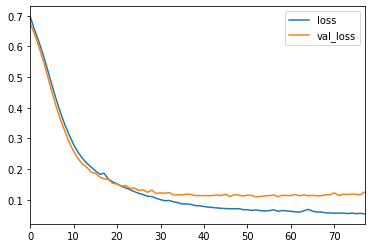

In [40]:
model_loss.plot()

In [41]:
#adding dropout layers to top overfitting

In [42]:
from tensorflow.keras.layers import Dropout

In [43]:
model =Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#BINARY CLASSIFICATION PROBLEM
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [44]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.7569 - val_loss: 0.6757
Epoch 2/600
426/426 [==============================] - 0s 99us/sample - loss: 0.6965 - val_loss: 0.6576
Epoch 3/600
426/426 [==============================] - 0s 73us/sample - loss: 0.6736 - val_loss: 0.6443
Epoch 4/600
426/426 [==============================] - 0s 68us/sample - loss: 0.6613 - val_loss: 0.6237
Epoch 5/600
426/426 [==============================] - 0s 68us/sample - loss: 0.6527 - val_loss: 0.6003
Epoch 6/600
426/426 [==============================] - 0s 70us/sample - loss: 0.6372 - val_loss: 0.5805
Epoch 7/600
426/426 [==============================] - 0s 66us/sample - loss: 0.6049 - val_loss: 0.5570
Epoch 8/600
426/426 [==============================] - 0s 63us/sample - loss: 0.5847 - val_loss: 0.5289
Epoch 9/600
426/426 [==============================] - 0s 70us/sample - loss: 0.5727 - val_loss: 0.4994
Epoch 10/600
426/42

426/426 [==============================] - 0s 61us/sample - loss: 0.1421 - val_loss: 0.1062
Epoch 79/600
426/426 [==============================] - 0s 66us/sample - loss: 0.1226 - val_loss: 0.1118
Epoch 80/600
426/426 [==============================] - 0s 63us/sample - loss: 0.1187 - val_loss: 0.1154
Epoch 81/600
426/426 [==============================] - 0s 61us/sample - loss: 0.1124 - val_loss: 0.1085
Epoch 82/600
426/426 [==============================] - 0s 63us/sample - loss: 0.1322 - val_loss: 0.1122
Epoch 83/600
426/426 [==============================] - 0s 61us/sample - loss: 0.1198 - val_loss: 0.1102
Epoch 84/600
426/426 [==============================] - 0s 61us/sample - loss: 0.1410 - val_loss: 0.1134
Epoch 85/600
426/426 [==============================] - 0s 56us/sample - loss: 0.1298 - val_loss: 0.1097
Epoch 86/600
426/426 [==============================] - 0s 59us/sample - loss: 0.1277 - val_loss: 0.1151
Epoch 87/600
426/426 [==============================] - 0s 63us/samp

In [46]:
model_loss=pd.DataFrame(model.history.history)

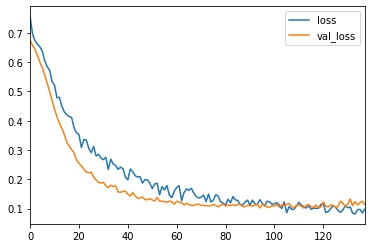

In [47]:
model_loss.plot()

In [48]:
#evaluation on classes

In [50]:
predictions=model.predict_classes(X_test)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [54]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
